tensorflow version 2.6.0


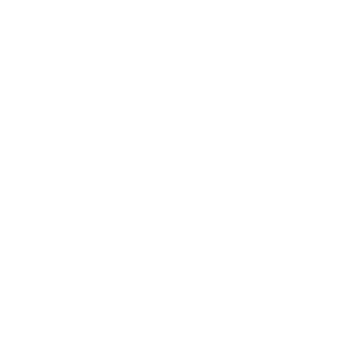

In [1]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import HTML
import matplotlib.animation as animation
from sklearn.decomposition import  PCA,TruncatedSVD,FastICA
from utils import Preprocessing,Animation
from utils import Visualize
from dataloader import DataLoader
import random
import config
from  pathlib  import Path 
print("tensorflow version" ,tf.__version__)
device = tf.config.list_physical_devices()[-1]

In [2]:
plt.rcParams['text.usetex'] = False
plt.rcParams['font.size'] = 12
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

#We are initializing the experiment being analyzed
exp = config.experiment["NAME"]

In [3]:
pp =  Preprocessing(config.data['INPUT_PATH'])

df =  pp.get_files()

# load some test data for demonstration and plot a wireframe
dl = DataLoader(config.data['file_path2'],keepdims=False, crop_dims= (128,128) )
dl.load()

104 files read successfully
2114  1 second audio samples created successfully


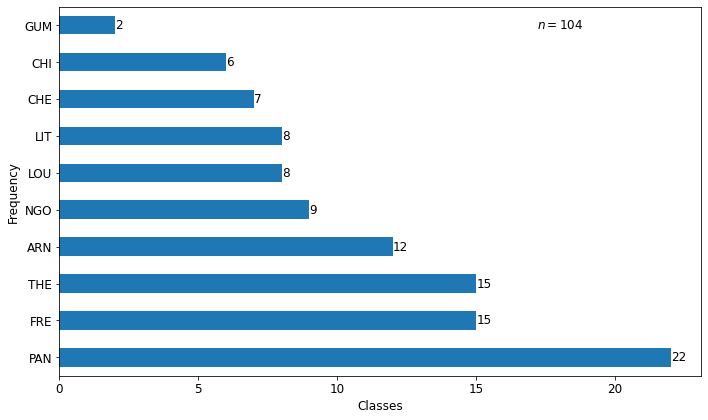

In [4]:
viz =  Visualize(config.figures['figpath'])
viz.show_distribution(df,save=True,filename=f'Data_Distribution_{exp}', figsize=(10,6))

In [10]:
n =  6
idx = np.random.randint(0, dl.X.shape[0], n)

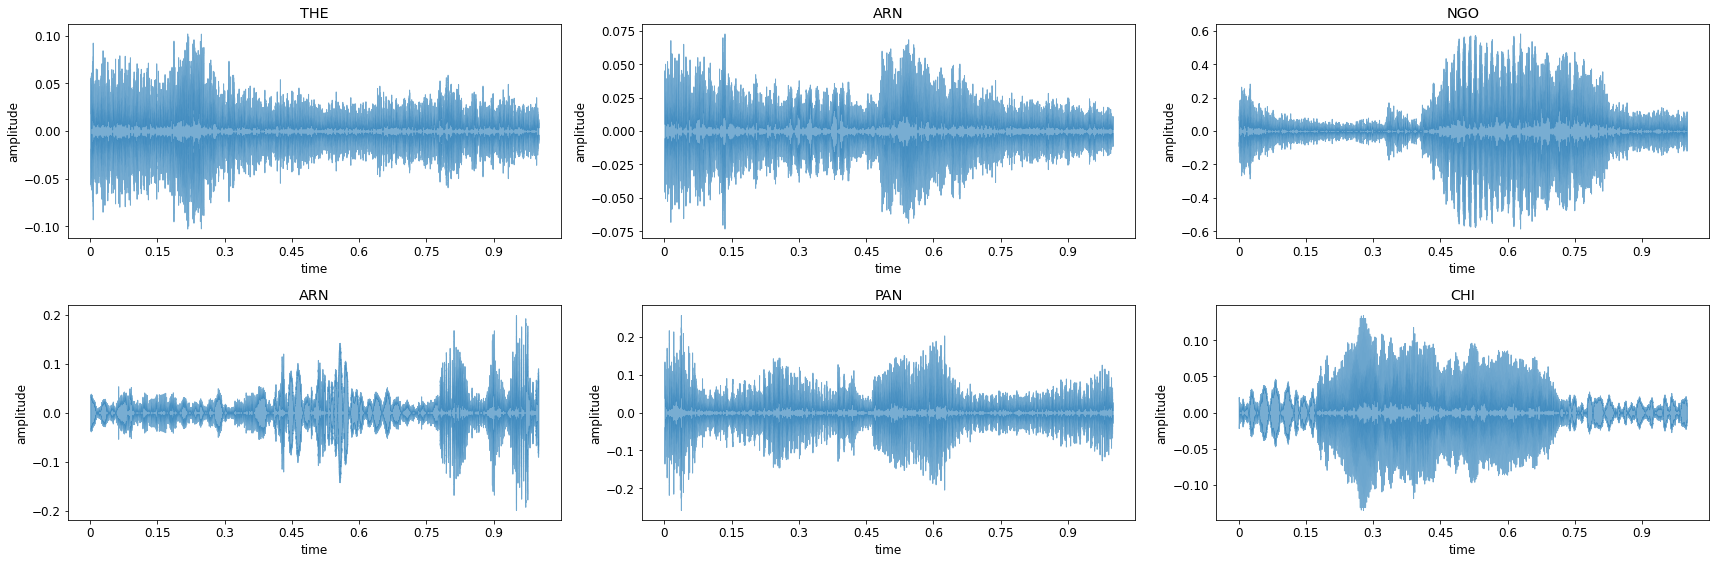

In [11]:
viz.display(dl.X,dl.Z,dl.y,dl.CLASSES,idx,filename=f'Sample_Waveplot_{exp}.png')

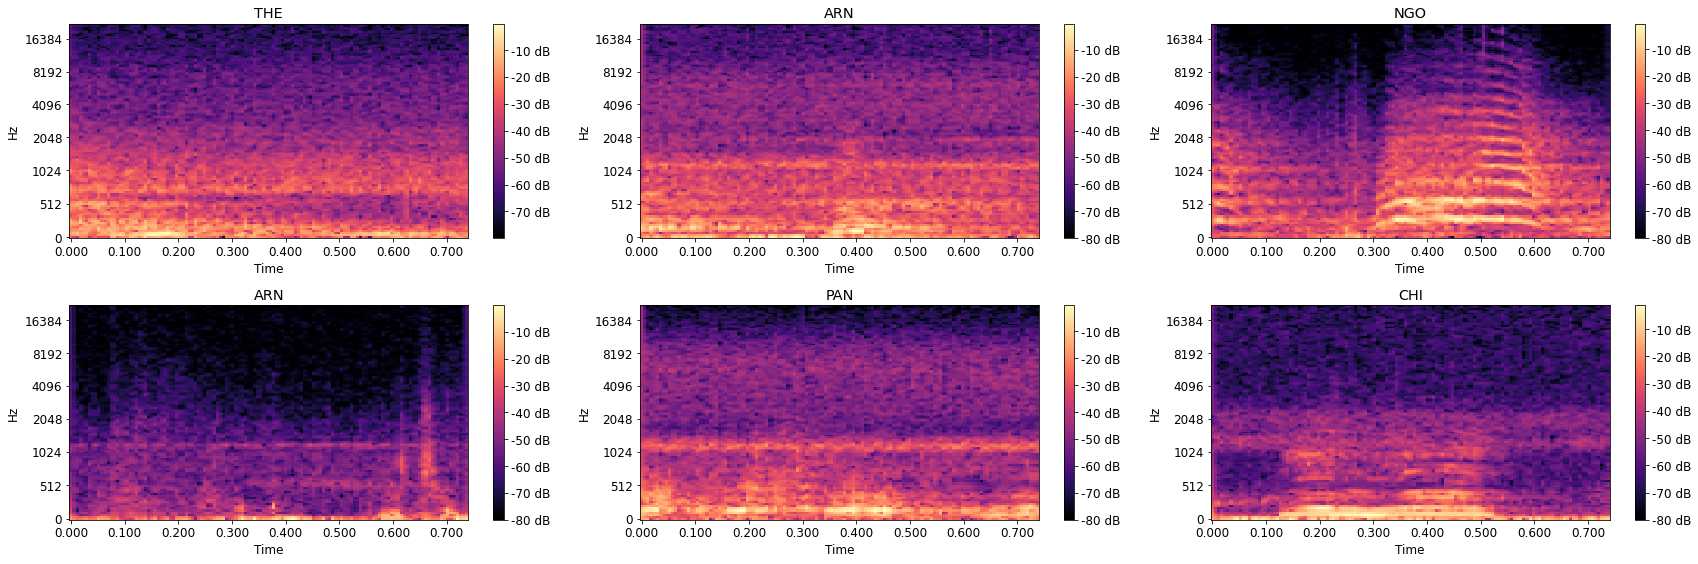

In [12]:
viz.display(dl.X,dl.Z,dl.y,dl.CLASSES,idx, flag=True,filename=f'UnNormalized_Frequency_Spectogram_{exp}.png')

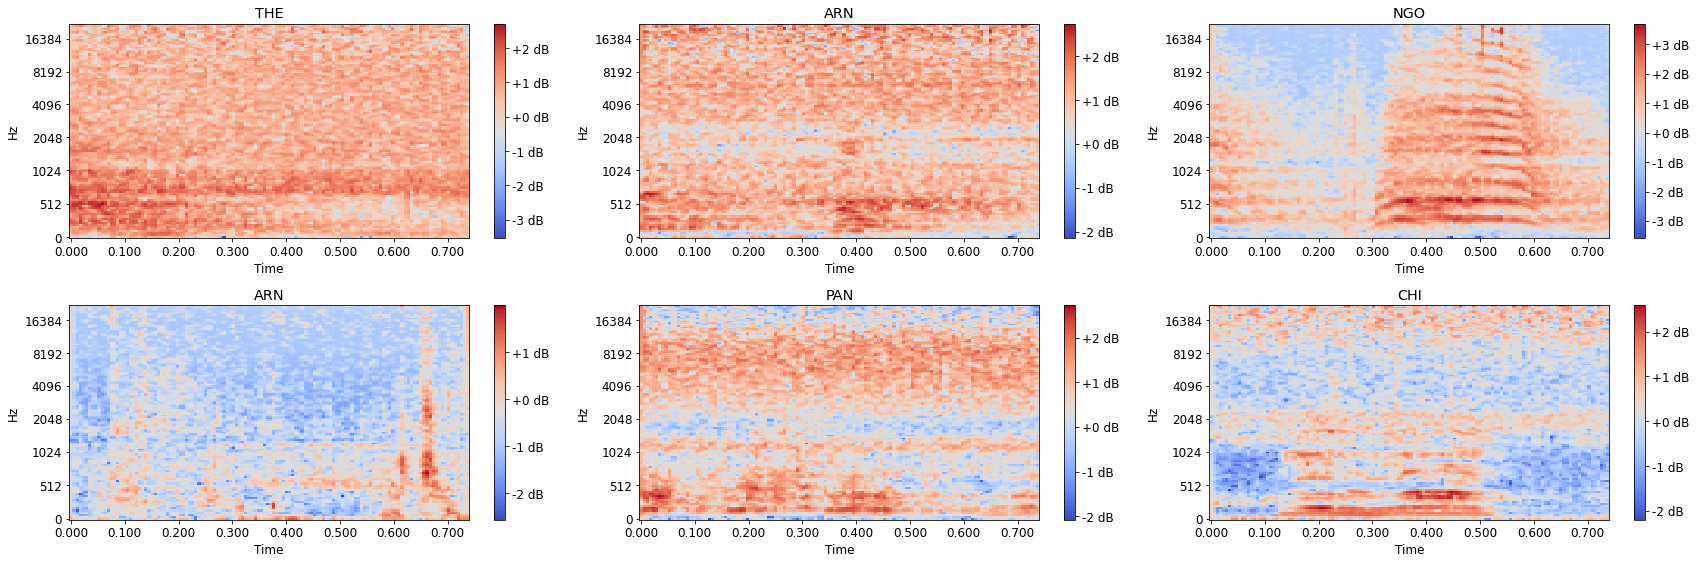

In [13]:
viz.display(dl.X_,dl.Z,dl.y,dl.CLASSES,idx, flag=True, save=True, filename=f'Normalized_Frequency_Spectogram_{exp}.png')

In [14]:
dl.project3D(PCA, n_components = 3)

 Successfully projected 128 to 3 dimensions using PCA


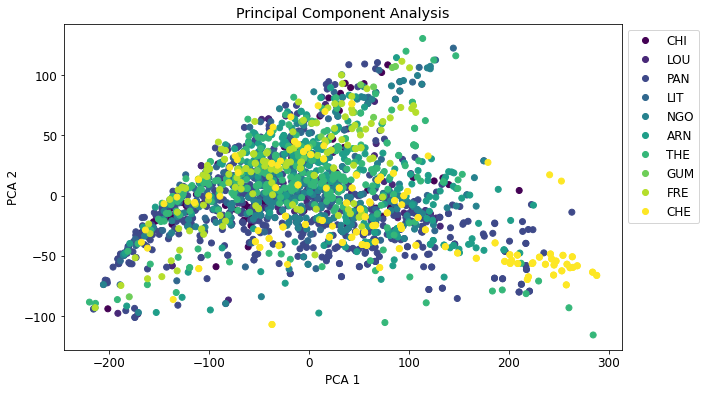

In [15]:
viz.plot_components(dl.X_projection,dl.y,dl.CLASSES,x_str='PCA 1', y_str='PCA 2', str_title="Principal Component Analysis", title=f"Normalized_PCA_{exp}.png")

In [16]:
dl.project3D(TruncatedSVD, n_components = 3)

 Successfully projected 128 to 3 dimensions using Tru


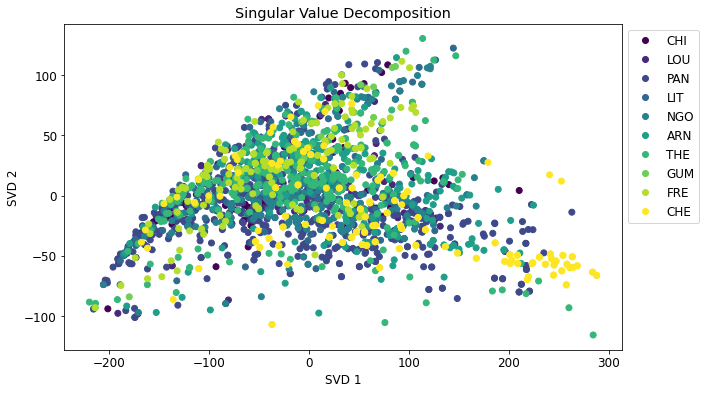

In [17]:
viz.plot_components(dl.X_projection,dl.y,dl.CLASSES,x_str='SVD 1', y_str='SVD 2', str_title="Singular Value Decomposition", title=f"Normalized_SVD_{exp}.png")

In [18]:
dl.project3D(FastICA, n_components = 3)

 Successfully projected 128 to 3 dimensions using Fas


/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


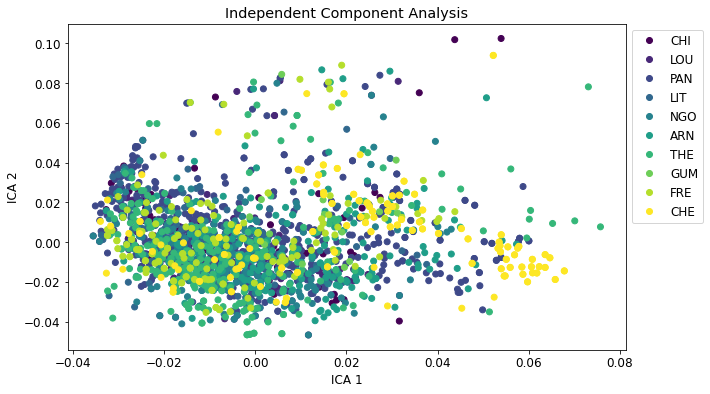

In [21]:
viz.plot_components(dl.X_projection,dl.y,dl.CLASSES,x_str='ICA 1', y_str='ICA 2', str_title="Independent Component Analysis", title=f"Normalized_ICA_{exp}.png")

In [20]:
dl.project3D(FastICA, n_components = 3)

 Successfully projected 128 to 3 dimensions using Fas


/net/store/cv/users/ybrima/miniconda3/envs/CV/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


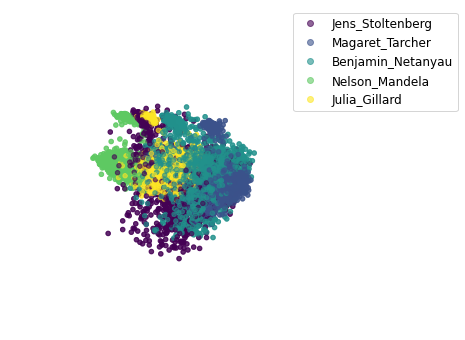

In [24]:
fig = plt.figure(1,figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.grid(False)
ax.set_axis_off()

def init():
    scatter = ax.scatter(dl.X_projection[:,0], dl.X_projection[:,1], dl.X_projection[:,2], c=list(dl.y),marker='o', s=20, alpha=0.6)
    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_zlabel("$x_3$")
    ax.legend(handles=scatter.legend_elements()[0], labels=dl.CLASSES,bbox_to_anchor=(1.4, 1.0))
    return fig,

def animate(i):
    ax.view_init(elev=30., azim=3.6*i)
    return fig,

# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=100, blit=True)    

HTML(ani.to_html5_video())

In [25]:
ani.save(f'./Figures/animation_ICA_{exp}.mp4',dpi=100,savefig_kwargs={'frameon': False,'pad_inches': 'tight'})
%cd Figures
!ffmpeg -i animation_ICA_Speeches.mp4 -filter:v fps=fps=60 animation_ICA_Speeches.gif
%cd ..

<ipython-input-25-db944a9add9f>:1: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  ani.save('./Figures/animation_ICA_Speeches.mp4',dpi=100,savefig_kwargs={'frameon': False,'pad_inches': 'tight'})


/net/store/cv/users/ybrima/RTGCompCog/ChimCLR/Figures
ffmpeg version 4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 9.4.0 (GCC)
  configuration: --prefix=/net/store/cv/users/ybrima/miniconda3/envs/CV --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-vaapi --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-libvpx --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/pkg-config
  libavutil      56. 70.100 / 56. 70.100
  libavcodec     58.134.100 / 58.134.100
  libavformat    58. 76.100 / 58. 76.100
  libavdevice    58. 13.100 / 58. 13.1